# Analyzing the Data Among Anime and its Fans
### William Poling

## Table of Contents

I. Introduction

II. Data Gathering
* A. Shows Data
    * The Season Issue
* B. Users Data

III. Data Visualization and Analysis
* A. Users
    * Gender
    * Age
    * Location
* B. Shows
    * Ratings
    * Genre
    * Episodes

IV. Conclusions and Further Research

# I. Introduction

Looking at entertainment data can be interesting and fun. While it doesn't necessarily solve complex problems, it can be cool to see the different things that people are interested in, as well as predict different things they might want to watch, read, play, etc. This tutorial will look at Japanese cartoons, colloquially: "anime." Anime is a very broad term for a very wide form of media that has been increasing in popularity throughout the West over the past century.

Information about what people watch can be hard to come by, but fortunately, there is a website called MyAnimeList.net (MAL): a cross between a user-based forum and a personal rating site. Users can create their own list of shows that they are currently watching, have already completed, plan to watch in the future, or have given up on watching. When adding shows to this list, users can assign it a ranking from 1-10, which is not only shown on their list, but also used to calculate an overall score for that show, which is displayed on that show's page.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import operator

The libraries imported:
* Numpy and Pandas for storing data easily and efficiently
* Seaborn and Pyplot for visualizing data
* operator for various small code bits

# II. Data Gathering

The data used comes from Kaggle. Specifically: https://www.kaggle.com/azathoth42/myanimelist. The two main datasets I want to look at are the **users_cleaned.csv** which displays account information about each user, as well as aggregations from their lists, and the **anime_cleaned.csv** which displays show information. Each of these sets has been filtered (only includes data from users who have put in their birthday, gender, and location) and cleaned (excludes data that is clearly erroneous).

Important to note: there is a dataset that would be useful to use called **animelists_cleaned.csv** which contains each user's list. Unfortunately, this dataset is incredibly large (2gb) and I had trouble using pandas to load it (my laptop is getting old), so I was unable to include the data and analysis for that info.

In [2]:
shows = pd.read_csv("anime_cleaned.csv")
users = pd.read_csv("users_cleaned.csv")

# Drop columns that are not relevant to this tutorial
shows = shows.drop(['title_japanese', 'status', 'image_url', 'duration', 'title_synonyms', 'background','broadcast', 'opening_theme', 'ending_theme'], axis=1 )

#Drop columns that are not relevant
users = users.drop(['username', 'user_id', 'access_rank', 'last_online', 'stats_rewatched'], axis=1)


## II.A Shows data

In [3]:
#Storing a backup of the entire dataset
shows_pure = shows
# Want to focus on shows as opposed to movies or specials, and most shows air on a 10-13 episode seasonal basis.
shows = shows[shows.episodes >= 10]
# Do not want shows that are currently airing (well...airing when the dataset was last updated about 5 months ago)
shows = shows[shows.airing == False]
# Do not want to consider pornographic material
shows = shows[shows.rating != 'Rx - Hentai']

#These columns will come up shortly
shows['adj_score'] = shows['score']
shows['adj_eps'] = shows['episodes']

To start, I scrape out some of the less important parts that won't contribute to our analysis well. Analyzing movies or the currently airing shows could be cool, but is ultimately not what this tutorial is about.

In [4]:
#Creating an "important" columns for display purposes
shows_important = \
shows[['anime_id', 'title', 'title_english', 'type', 'source', 'episodes', 'aired_string', 'score', 'scored_by', 'rank', 'popularity']]

shows_important.sort_values('score', ascending=False)

,anime_id,title,title_english,type,source,episodes,aired_string,score,scored_by,rank,popularity
1261,5114,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist: Brotherhood,TV,Manga,64,"Apr 5, 2009 to Jul 4, 2010",9.25,733592,1.0,4
639,28977,Gintama°,Gintama Season 4,TV,Manga,51,"Apr 8, 2015 to Mar 30, 2016",9.15,71751,3.0,383
1475,9253,Steins;Gate,Steins;Gate,TV,Visual novel,24,"Apr 6, 2011 to Sep 14, 2011",9.14,563857,5.0,8
6100,820,Ginga Eiyuu Densetsu,Legend of the Galactic Heroes,OVA,Novel,110,"Jan 8, 1988 to Mar 17, 1997",9.11,29036,6.0,671
4284,9969,Gintama&#039;,Gintama Season 2,TV,Manga,51,"Apr 4, 2011 to Mar 26, 2012",9.11,92025,7.0,342
223,11061,Hunter x Hunter (2011),Hunter x Hunter,TV,Manga,148,"Oct 2, 2011 to Sep 24, 2014",9.11,403377,8.0,35
668,35180,3-gatsu no Lion 2nd Season,March Comes In Like A Lion 2nd Season,TV,Manga,22,"Oct 14, 2017 to Mar 31, 2018",9.10,30779,9.0,990
2774,15417,Gintama&#039;: Enchousen,Gintama: Enchousen,TV,Manga,13,"Oct 4, 2012 to Mar 28, 2013",9.07,63468,10.0,685
5219,34096,Gintama.,Gintama Season 5,TV,Manga,12,"Jan 9, 2017 to Mar 27, 2017",9.02,40441,13.0,934
3147,918,Gintama,Gintama,TV,Manga,201,"Apr 4, 2006 to Mar 25, 2010",9.01,141830,15.0,95


**Column descriptions (including ones not displayed but not ones deleted)**
* anime_id: Unique id for each show
* *title*: Title of the show
* *title_english*: English version of the title
* *type*: Type of content - TV, OVA (direct to video), ONA (direct to internet), Movie, Music, Special (last three mostly exluded)
* *source*: Source content for the show (many shows are based on manga or novels)
* *episodes*: # of episodes
* *aired_string* / aired: When the show aired, both in String and JSON format
* rating: Age rating of the show
* *score*: Average score for the show
* *scored_by*: How many people have given a rating for the show
* *rank*: Ranking of the show (based on score)
* *popularity*: Popularity of the show (based on how many people have watched it)
* members: How many people have listed the show (ranked or not)
* favorites: How many people have favorited the show
* premiered: When the show started airing
* related: Other media connected to the show (including what the source is, as well as sequels and prequels)
* producer: Who produced the show
* licensor: Who licenses the show
* studio: Who created the show
* genre: Genre(s) of the show - almost any show has multiple
* duration_min: How long each episode is (in minutes)
* aired_from_year: What year the show started airing

### "The season issue"

An issue with anime is that each individual season is considered its own show, both by the industry and by MAL. This is important for two main reasons: sequels will naturally trend higher as only people who liked the first part of the show will continue watching the second and so on, and certain shows will get counted multiple times.

So what to do about shows with multiple seasons? There are a few imperfect options: 
* Averaging each season into a singular season, which can be difficult since it can be hard to accurately tell which shows are in the same season (can have different naming conventions)
* Reduce each seasons score by some set amount, which can be problematic because shows will still be double counted
* Remove all of the extra seasons, which can cause issues with long running shows or shows with peaks in season 2+
* Do nothing

In this tutorial, I will be using the first option, which is thankfully made easier by the "related" column. This column provides the anime_id for any sequels or prequels a show has, which allows for lookups in the table, and therefore easier grouping. I will also be reducing the score for each sequel by a small amount, multiplied by season.

#### Resolution

In this first cell, I iterate through the 'related' data for each column. 
Unfortunately, it is in an invalid version of the JSON format so converting it through the json package is difficult.
Instead, I just parsed it as a string and found the IDs for each sequel, which can be used to look up in the shows table.

In [5]:
#Create map to store show_id -> sequel_id (s)
sequel_map = {}

for i, row in shows.iterrows():
    rel = row['related']
    show_id = row['anime_id']
    if "\'Sequel\'" in rel:
        seq_ind = rel.index("\'Sequel\': [{")
        end_seq_ind = rel.index("}]", seq_ind)

        rel = rel[seq_ind+12:end_seq_ind]
        
        ids = []
        
        #This loop is used due to the fact that shows can have multiple sequels (usually movies + the next season)
        while "\'mal_id\':" in rel:
            id_ind = rel.index("\'mal_id\': ") + 10
            end_id_ind = rel.index(',', id_ind)
            seq_id = int(rel[id_ind:end_id_ind])
            ids.append(seq_id)
            rel = rel[end_id_ind:]
        
        sequel_map[show_id] = ids

#Storing all values of the map to be listed as sequels
all_sequels = [item for sublist in list(sequel_map.values()) for item in sublist]

Next, I parsed the mapping of season -> next season with some dictionary moving.

First, I got all of the values that were the beginning season of the show (they didn't show up in the values of the map). This was done to avoid double counting (as in getting an adjusted score for s1 and s2 of the same show).

Second, I went through all of these non-sequel shows and traversed the mapping done above to find all of their sequels. Some of the shows had 2 sequels listed, some of which were movies or otherwise irrelevant. In this case I just took the relevant ones (if it showed up in the main table then it was an actual show and not a movie).

This resulted in a mapping of show -> list of all of its seasons in order.

In [6]:
#Storing all keys of the map that aren't in the all_sequels list as non-sequels
non_sequels = []
#Map of show -> show -> ... representing a show's multiple seasons
show_chains = {}

for key, value in sequel_map.items():
    if key not in all_sequels:
        non_sequels.append(key)

#This loop is a bit all over the place, but it is looping through all non-sequels and then looping through each of those
#show's sequels until it finds a sequel that isn't a key in the map (i.e. it has no further sequel)
for show in non_sequels:
    s = show
    
    #If the show is in the main sequel map, keep looping
    while s in sequel_map.keys():
        #Get all sequels
        seqs = sequel_map[s]
        if len(seqs) == 1:
            #If there is only one sequel, update the mapping for the show with the new sequel
            if show in show_chains:
                if seqs[0] in shows.anime_id.unique():
                    show_chains[show].append(seqs[0])
            else:
                if seqs[0] in shows.anime_id.unique():
                    show_chains[show] = seqs
            #Update s to be the next sequel
            s = seqs[0]
        else:
            #If there are multiple sequels, only add them if they appear in the main shows list 
            # (i.e. they are a show and not a movie, etc.)
            new_seqs = []
            for test_show in seqs:
                if test_show in shows.anime_id.unique():
                    new_seqs.append(test_show)
                    s = test_show
            if len(new_seqs) == 0:
                s = -1
            else:
                if show in show_chains:
                    show_chains[show] = show_chains[show] + new_seqs
                else:
                    show_chains[show] = new_seqs

Finally, I traversed this map and averaged these scores with lower weights given to season 2, and even lower to season 3 or later. These averages were thrown into the adj_score column for each show, with NaN given to shows that were sequels since we don't want to double count.

Here, I also counted the total number of episodes for the shows which can be used later on.

In [7]:
#Multipliers for seasons past 1. These may not be perfect but will help offset the issue a bit
SEASON_2_MULT = 0.95
SEASON_3plus_MULT = 0.92

#This loop goes through the season -> season map and creates and adjusted score
#and adds up all of the episodes among the season
for key, value in show_chains.items():
    seq_num = 1
    show_info = shows.loc[shows.anime_id == key]
    show_scores = [show_info.score.item()]
    show_eps = show_info.episodes.item()
    
    for sequel in show_chains[key]:
        seq_pure_score = shows.loc[shows.anime_id == sequel].score.item()
        show_eps += shows.loc[shows.anime_id == sequel].episodes.item()
        if seq_num == 1:
            seq_adj_score = seq_pure_score * SEASON_2_MULT
        else:
            seq_adj_score = seq_pure_score * SEASON_3plus_MULT
        
        show_scores.append(seq_adj_score)
        seq_num+=1
        #Add NaN to shows that are sequels, since their score and episodes will be counted in the main show
        shows.loc[shows.anime_id == sequel, 'adj_score'] = np.nan
        shows.loc[shows.anime_id == sequel, 'adj_eps'] = np.nan
    
    shows.loc[shows.anime_id == key, 'adj_score'] = sum(show_scores) / float(len(show_scores))
    shows.loc[shows.anime_id == key, 'adj_eps'] = show_eps


#### Visuals
Looking at the graphs below, there isn't a strong case for sequel biasing when considering every show. However, when considering higher ranked shows (> 7 score), there is a larger jump.

After adjusting the scores, everything seems a bit lower across the board. Note that these are average scores for every show, so they're still sitting comfortably over 7 on average. More on this later.

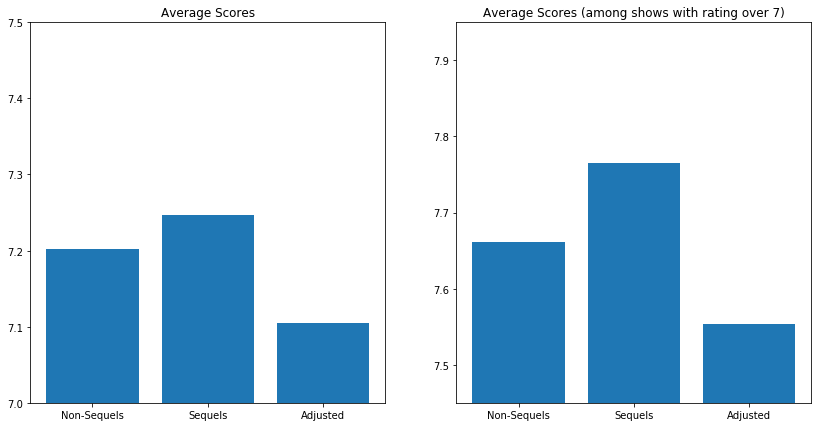

In [8]:
nseq_score = shows.loc[shows.anime_id.isin(non_sequels)]
seq_score = shows.loc[shows.anime_id.isin(all_sequels)]

plt.figure(figsize=(14, 7))

plt.subplot(1,2,1)
plt.title('Average Scores')
plt.bar([0,1,2], [nseq_score.score.mean(), seq_score.score.mean(), nseq_score.adj_score.mean()])
plt.ylim(7,7.5)
plt.xticks([0,1,2], ("Non-Sequels", "Sequels", "Adjusted"))

nseq_score = nseq_score.loc[shows.score > 7]
seq_score = seq_score.loc[shows.score > 7]


plt.subplot(1,2,2)
plt.title('Average Scores (among shows with rating over 7)')
plt.bar([0,1,2], [nseq_score.score.mean(), seq_score.score.mean(), nseq_score.adj_score.mean()])
plt.ylim(7.45,7.95)
plt.xticks([0,1,2], ("Non-Sequels", "Sequels", "Adjusted"))

plt.show()

## II.B Users data

In [9]:
#Important table just for display purposes
users_important = \
users[['user_watching', 'user_completed', 'user_onhold', 'user_dropped', 'user_plantowatch', 'gender', 'location',\
      'stats_mean_score', 'stats_episodes']]

users_important.head()

,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,gender,location,stats_mean_score,stats_episodes
0,3,49,1,0,0,Female,"Chennai, India",7.43,3391
1,45,195,27,25,59,Male,"Detroit,Michigan",6.15,4903
2,25,414,2,5,11,Male,"Nayarit, Mexico",8.27,9701
3,5,5,0,0,0,Female,"Malaysia, Kuantan",9.70,697
4,35,114,6,20,175,Male,"Nijmegen, Nederland",7.86,1847


**Column descriptions (including ones not displayed but excluding deleted)**
* *user_watching*: How many shows this user is currently watching
* *user_completed*: How many shows this user has finished
* *user_onhold*: How many shows this user has on hold (has not completed but plans to)
* *user_droped*: How many shows this user has dropped (has started but does not plan to finish)
* *user_plantowatch*: How many shows this user is currently watching
* user_days_spent_watching: How long (in days) this user has watched anime
* *gender*
* *location*
* *age*
* *join_date*: When the user joined MAL
* *stats_mean_score*: The mean score of shows this user has rated
* *stats_episodes*: The number of episodes this user has watched

#### Modifying the users table

Unlike the shows table, there isn't a large change that needs to be made for the users. Below, I've made a few small changes so that gathering user data is a bit easier.

I've changed birthday -> age in years and join_day -> account age. I don't end up using account age in the end, but I added it in case I did down the line.

Additionally, I've attempted to split up location into sub-location (such as city) and location (county or state). Unfortunately, users can submit any text to the location field, so there are multiple issues with some of the data (imaginary, misformatted, or other unusual answers)

In [10]:
ages = []
acct_ages = []
locs = []
sub_locs = []

for i, row in users.iterrows():
    jd = row.join_date[0:4]
    bd = row.birth_date[0:4]
    ages.append(2017-int(bd))
    acct_ages.append(2017-int(jd))
    
    if type(row.location) == str:
        loc = row.location.split(",")
        if len(loc) == 1:
            locs.append(loc[0])
            sub_locs.append(np.nan)
        else:
            sub_locs.append(loc[0])
            locs.append(loc[1])
    else:
        locs.append(row.location)
        sub_locs.append(np.nan)
    

users['age'] = ages
users['acct_age'] = acct_ages
users['loc'] = locs
users['sub_loc'] = sub_locs

In [11]:
users = users.drop('birth_date', 1)
users = users.drop('join_date', 1)

In [12]:
users[['age', 'acct_age', 'location', 'loc', 'sub_loc']].head()

,age,acct_age,location,loc,sub_loc
0,27,4,"Chennai, India",India,Chennai
1,26,9,"Detroit,Michigan",Michigan,Detroit
2,27,8,"Nayarit, Mexico",Mexico,Nayarit
3,19,7,"Malaysia, Kuantan",Kuantan,Malaysia
4,18,2,"Nijmegen, Nederland",Nederland,Nijmegen


# III. Data Visualization

Here, we take a look at some of the basic demographic data of the users and shows on MAL. This can be used to determine the distributions of age, gender, location, etc. for the users of the site, which may be an indicator of the overall demographics of people who watch anime in general. Obviously, not everybody who watches anime will use this site, and therefore the data may be skewed towards more "hardcore" fans.

## III.A User Demographics

Here I will take a look at the different distributions of gender, age, and location among the MAL community.

### Gender

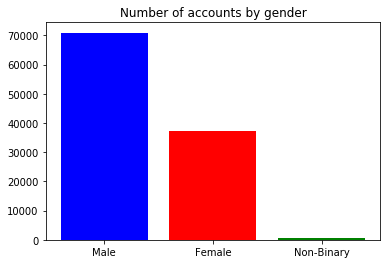

% Male: 65.2003937044
% Female: 34.3387513683
% Non-Binary: 0.460854927284


In [13]:
f = users.loc[users.gender == 'Female'].gender.count()
m = users.loc[users.gender == 'Male'].gender.count()
nb = users.loc[users.gender == 'Non-Binary'].gender.count()

plt.title('Number of accounts by gender')
plt.bar([0,1,2], [m, f, nb], color=['blue', 'red', 'green'])
plt.xticks([0,1,2], ("Male", "Female", "Non-Binary"))
plt.show()

perc_m = 100* m / (m + f + nb)
perc_f = 100* f / (m + f + nb)
perc_nb = 100* nb / (m + f + nb)
print("% Male: " + str(perc_m))
print("% Female: " + str(perc_f))
print("% Non-Binary: " + str(perc_nb))

To start, the basic gender distribution is shown. It is very clearly male heavy, with close to 70% of users in the dataset being male. The anime community, similar to the gaming community, has a disproportionate amount of men. The reasons for this are rooted in multiple different things, but are definitely perpetuated by a pandering to the male audience by Japanese studios, which will be more clear when analyzing the show data.

Going forward, I will analyze only the male and female users due to the fact that the percentage of non-binary users is too small to gather meaningful data relative to the other two categories.

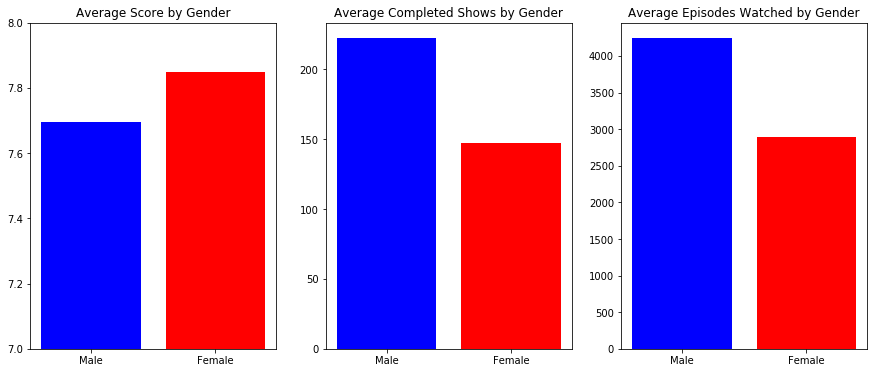

In [14]:
f_avg_score = users.loc[users.gender == 'Female'].stats_mean_score.mean()
m_avg_score = users.loc[users.gender == 'Male'].stats_mean_score.mean()

f_avg_completed = users.loc[users.gender == 'Female'].user_completed.mean()
m_avg_completed = users.loc[users.gender == 'Male'].user_completed.mean()

f_avg_episodes = users.loc[users.gender == 'Female'].stats_episodes.mean()
m_avg_episodes = users.loc[users.gender == 'Male'].stats_episodes.mean()

plt.figure(figsize=(15, 6))

plt.subplot(1,3,1)
plt.title('Average Score by Gender')
plt.bar([0,1], [m_avg_score, f_avg_score], color=['blue', 'red'])
plt.xticks([0,1], ("Male", "Female"))
plt.ylim(7,8)

plt.subplot(1,3,2)
plt.title('Average Completed Shows by Gender')
plt.bar([0,1], [m_avg_completed, f_avg_completed], color=['blue', 'red'])
plt.xticks([0,1], ("Male", "Female"))

plt.subplot(1,3,3)
plt.title('Average Episodes Watched by Gender')
plt.bar([0,1], [m_avg_episodes, f_avg_episodes], color=['blue', 'red'])
plt.xticks([0,1], ("Male", "Female"))

plt.show()

Looking at some more statistics by gender we see that not only do more men watch anime in general, but also that the average man watches about 1.5x the amount of episodes and completes about 1.5x the amount of shows. This means that more men in general watch anime and the men that do tend to also watch more anime individually, leading to a further male centric community, since more of the hardcore fans will be male.

On the other hand, average scores are very similar (maybe about 0.2 difference on average), so there is no strong case for gender bias when it comes to scoring shows. Perhaps this small difference comes from men being more picky, or from the shows most men would be interested in having higher production value.

### Age

Average overall age: 24.1258198342


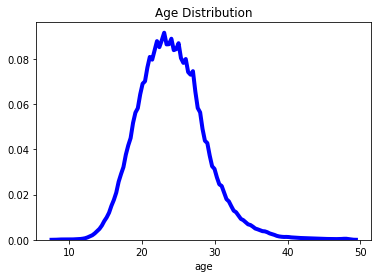

In [15]:
age_counts = users.groupby(['age']).gender.count()
age_means =  users.groupby(['age']).mean()

avg_age = users.age.mean()
print("Average overall age: " + str(avg_age))

plt.title('Age Distribution')
sns.distplot(users['age'], hist=False, kde=True, 
             bins=int(40), color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.show()

First, looking at the age range for users of MAL it looks like there are mostly users in their early 20s with some skew towards older ages, although that falls off after around 28 or 29. The minimum age is 9 and the maximum age is 48 in this dataset. I am hesistant to include people with age 9 in my analysis since in my mind most 9 year olds do not have easy access to the internet (this may be different in the past few years). I am including them since, while there is a large amount of young adults using the site, there is a lot of anime that is aimed mainly at children so I think it would be wise to include them in considerations.

To reiterate, this is only more hardcore fans, which for any hobby will tend to trend higher in age due to the fact that adults tend to have more agency and money. There are a lot of children that watch anime growing up, but it's unlikely they'll go on a site to rate the shows that they're watching when it's only one or two shows.

Mean episodes per show: 28.7555847569


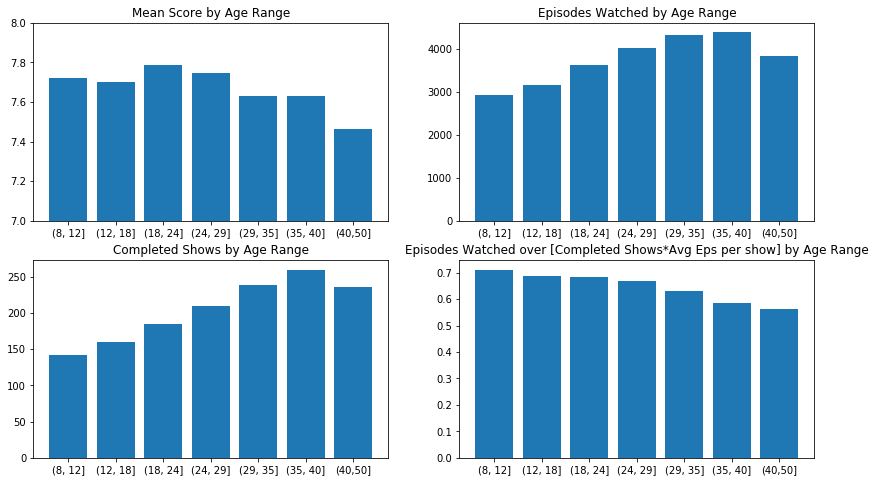

In [16]:
plt.figure(figsize=(14, 8))

age_groups_means = users.groupby(pd.cut(users["age"], [8,12,18,24,29,35,40,50])).mean()
age_groups_means

xlabs = ("(8, 12]", "(12, 18]", "(18, 24]", "(24, 29]", "(29, 35]", "(35, 40]", "(40,50]")

plt.subplot(2,2,1)

plt.title('Mean Score by Age Range')
plt.bar(np.arange(0,7), list(age_groups_means.stats_mean_score))
plt.ylim(7,8)
plt.xticks(np.arange(0,7), xlabs)

plt.subplot(2,2,2)

plt.title('Episodes Watched by Age Range')
plt.bar(np.arange(0,7), list(age_groups_means.stats_episodes))
plt.xticks(np.arange(0,7), xlabs)

plt.subplot(2,2,3)

plt.title('Completed Shows by Age Range')
plt.bar(np.arange(0,7), list(age_groups_means.user_completed))
plt.xticks(np.arange(0,7), xlabs)

plt.subplot(2,2,4)

mean_episodes = shows['episodes'].mean()
print("Mean episodes per show: " + str(mean_episodes))

prop = age_groups_means.stats_episodes / (mean_episodes * age_groups_means.user_completed)

plt.title('Episodes Watched over [Completed Shows*Avg Eps per show] by Age Range')
plt.bar(np.arange(0,7), list(prop))
plt.xticks(np.arange(0,7), xlabs)

plt.show()

Like with gender, here are some charts with different information by age range.

Mean score seems to be fairly consistent across the different age ranges, with older people tending to rate shows slightly lower (although only by a difference of about 0.1 - 0.2).

For total episodes watched and total completed shows, the bar charts look similar. With the numbers increasing as you get older. This makes sense intuitively since older people have had more time to watch anime. It would have been something interesting if teens or young adults had higher numbers, but this trend lines up well.

The last chart here is a representation of the average length of shows that people complete. The episodes watched value is a running count of how many episodes total a user has watched, and it is divided by the number of completed shows that user has, multiplied by the average episode length of a show. The result is a proportion of the number of episodes watched over the number of expected episodes watched for shows completed. The lower the number, the more shorter shows watched, as well as the more shows that are left uncompleted. Looking at the age ranges, we see that this proportion decreases with age, meaning that as you get older, you tend to watch shorter shows and/or finish less shows overall.

#### Location

In [17]:
#List of US states found on the internet, converted to all lowercase
US_STATES = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]

US_STATES = [state.lower() for state in US_STATES]

#convert user main locations to lowercase
users['loc'] = users['loc'].str.lower()

loc_counts = users.groupby(['loc']).count().reset_index()
#loc_counts.sort_values('user_watching', ascending=False)

#loop to create map of location -> number of members
loc_map = {}
loc_map['US'] = 0
for i, row in loc_counts.iterrows():
    location = row['loc'].strip()
    if location in US_STATES:
        loc_map['US'] = loc_map['US'] + row['user_watching']
    if location in loc_map:
        loc_map[location] = loc_map[location] + row['user_watching']
    else:
        loc_map[location] = row['user_watching']

sorted_lm = sorted(loc_map.items(), key=operator.itemgetter(1), reverse=True)

In [18]:
sorted_lm[0:25]

[('US', 15492),
 ('poland', 3574),
 ('california', 2893),
 ('philippines', 2212),
 ('canada', 2123),
 ('germany', 2062),
 ('brazil', 2028),
 ('australia', 1586),
 ('russia', 1562),
 ('france', 1526),
 ('england', 1494),
 ('portugal', 1411),
 ('indonesia', 1389),
 ('brasil', 1379),
 ('texas', 1306),
 ('sweden', 1261),
 ('new york', 1086),
 ('florida', 1067),
 ('uk', 971),
 ('italy', 941),
 ('finland', 940),
 ('norway', 869),
 ('usa', 862),
 ('the netherlands', 849),
 ('romania', 793)]

As stated earlier, the data here is not completely accurate. But based on what we do have, there is some information that can be looked at. Additionally, I aggregated all of the 50 states into a 'US' listing in the map.

Looking at the top 25 areas people have listed (above) we see that the US is by far the most common place for users to come from. Anime tends to mostly get translated into English over other languages. Subtitles tend to be in English officially and then other languages at the mercy of the licensor or fans. As for dubs, not even every show gets an English dub, let alone one in other languages.

Aside from the US as a whole, California, Florida, New York, and Texas show up as popular locations. These are fairly high populous areas so this lines up. Would be unusual if Kansas or Rhode Island showed up on the list.

Turning towards the non-US, most of the other countries seem to be spread out among the Western world. Poland and the Philippines take top 5 spots, which surprised me as neither of these areas are particularly large (in terms of population). Brazil and England unfortunately lose out on a lot of numbers since they have splits in what people put down ('uk' vs 'england' and 'brazil' vs 'brasil').

Since this is an English site, there is not as much Japanese representation among users, despite the media being primarily produced and marketed in Japan. D

Due to the issues with the data I don't think it would be wise to claim it represents even the community on MAL, let alone the entire anime community.

## III.B Show Statistics

Here I will take a look at the different aspects of the different shows themselves, including ratings, episode numbers, and  genres.

### Ratings



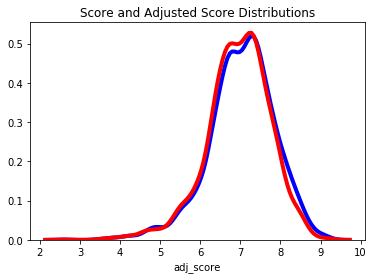

In [19]:
plt.title('Score and Adjusted Score Distributions')
sns.distplot(shows['score'], hist=False, kde=True, 
             bins=int(20), color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})


sns.distplot(shows['adj_score'].dropna(), hist=False, kde=True, 
             bins=int(20), color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.show()

If it hasn't been clear from analyzing the user's average ratings, it seems that the ratings are averaged at around 7-8 instead of something like 5, which is what you might expect from a 1-10 system. There may be many reasons to explain this, some of which involve the psychology of ratings. To me, it seems that ratings tend to be higher since if you dislike a show, you would likely drop it and not rate it in the first place. Unless you're really willing to watch a show for whatever reason, it isn't likely that you'd go through watching 12 or 24 (or more) episodes unless you felt at least a little positively about the show.

Based on the distribution above, there are almost no scores below 4 or above 9. It is important to note that movies (which will tend to have a huge range of values since they can be cheaper to produce but can also be very high quality) and porn (which will have a lower rating since they tend to be...less than satisfactory concerning actual content) are excluded, which will skew the average and distribution a little bit higher.

It is worth noting that the adjusted score does help push the distribution ever so slightly to the left.

Due to this shift, it is a good idea to normalize the ratings so that the distributions can be centered around 0

In [32]:
mean_score = shows['adj_score'].mean()
shows['standardized_adj_score'] = (shows['adj_score'] - mean_score) / shows['adj_score'].std()
shows.sort_values('standardized_adj_score', ascending=False)[['title', 'popularity', 'standardized_adj_score']].head()

,title,popularity,standardized_adj_score
1261,Fullmetal Alchemist: Brotherhood,4,2.893110
1475,Steins;Gate,8,2.754655
6100,Ginga Eiyuu Densetsu,671,2.716895
223,Hunter x Hunter (2011),35,2.716895
2485,Made in Abyss,178,2.465159


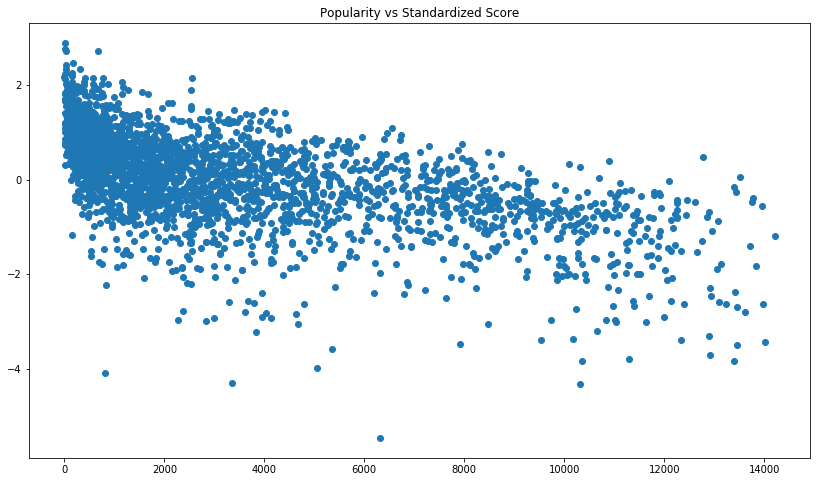

In [21]:
plt.figure(figsize=(14, 8))

plt.title('Popularity vs Standardized Score')
plt.plot(shows['popularity'], shows['standardized_adj_score'], 'o')
plt.show()

As one would expect, the more popular shows (lower popularity number) tend to have higher scores. There are some notable exceptions to this. The show *Pupa* (the 809th most popular show) had hopeful viewers but a myriad of issues, which resulted in a very low score (< 4 overall score). It was also very short, so there is less of a barrier of entry. The show *Legend of the Galactic Heroes* (*Ginga Eiyuu Densetsu* in romanized Japanese) is ranked 661 in popularity but is the 6th highest ranked show on the site, mostly due to it being an old and long classic (aired 1988-1997).

Normally, there would be more uniform density among popularity (since it is a ranking system), but a lot of the shows have been removed due to being sequels, movies, or porn. This further brings to the table that less overall people watch sequels then their predecessors.

### Genres


In [22]:
#Creating a new dataframe to split up genres
shows_genre_1 = shows[['genre', 'adj_score', 'standardized_adj_score', 'popularity', 'rank']]
shows_genre = pd.DataFrame(columns=['genre', 'adj_score', 'standardized_adj_score', 'popularity', 'rank'])
shows_genre_1 = shows_genre_1.dropna()

In [23]:
for i, row in shows_genre_1.iterrows():

    genres = row.genre.split(', ')
    for g in genres:
        g = g.strip()
        s = pd.Series([g, row.adj_score, row.standardized_adj_score, row.popularity, row['rank']],
                      index=['genre', 'adj_score', 'standardized_adj_score', 'popularity', 'rank'])
        shows_genre = shows_genre.append(s, ignore_index=True)

In [24]:
shows_genre['popularity'] = pd.to_numeric(shows_genre['popularity'])
genre_counts = shows_genre.groupby(['genre']).adj_score.count()
genre_info = shows_genre.groupby(['genre']).mean()
genre_info['count'] = genre_counts
genre_info = genre_info.sort_values('count', ascending=False)
genre_info.head()

,adj_score,standardized_adj_score,popularity,rank,count
genre,,,,,
Comedy,6.936629,-0.018684,3611.996865,4119.574451,1276
Action,7.058642,0.134892,2861.758929,3489.610969,784
Romance,7.178893,0.286248,1988.349206,3019.717813,567
Drama,7.306073,0.446327,2522.542805,2700.256831,549
Sci-Fi,7.009154,0.072602,3572.535780,3709.752294,545


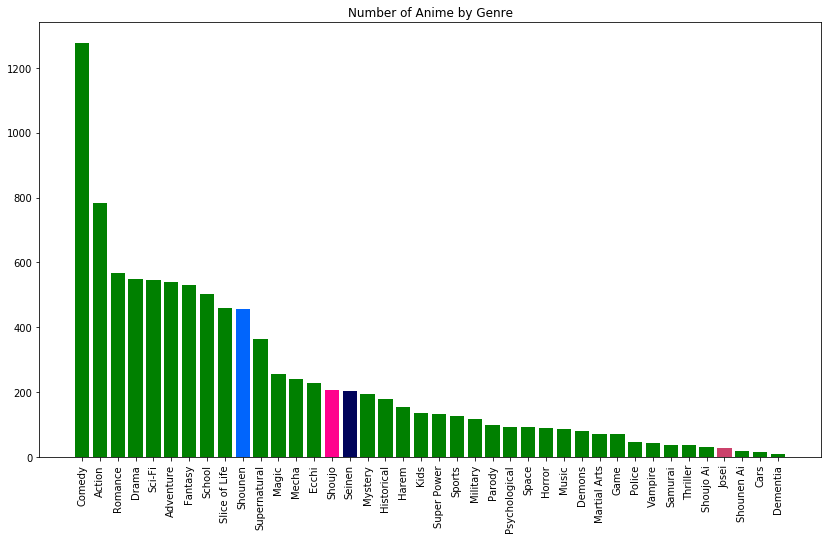

In [25]:
plt.figure(figsize=(14, 8))

genres = list(genre_info.index)
counts = list(genre_info['count'])
colors = []
for g in genres:
    if g == 'Shounen':
        colors.append('xkcd:bright blue')
    elif g == 'Seinen':
        colors.append('xkcd:dark blue')
        
    elif g == 'Shoujo':
        colors.append('xkcd:hot pink')
    elif g == 'Josei':
        colors.append('xkcd:dark pink')
    else:
        colors.append('green')
    
        
plt.title('Number of Anime by Genre')
plt.bar(np.arange(0,len(genres)), counts, color=colors)
plt.xticks(np.arange(0,len(genres)), genres, rotation='vertical')
plt.show()

There are some genres here that are not commonly used by American media. I'll give a short description of some of them:

* Shounen and Seinen (blue bars): shows aimed at boys (12-18) and adult men (18+) respectively. A large amount of incredibly popular manga/anime is shounen, including shows like Naruto or Fullmetal Alchemist.
* Shoujo and Josei (pink bars): shows aimed at girls (12-18) and adult women (18+) respectively
* Shounen/Shoujo Ai: shows about romantic relationships between men/women respectively
* Slice of Life: shows that tend to focus more on the characters' lives instead of following a plotline (not that plotlines are exluded from slice of life shows). American sitcoms such as The Office or Friends could also be classified as slice of life type shows.
* Mecha: shows about robots (usually giant and pilotable)
* Ecchi: shows with sexual content (without outright being pornographic)
* Harem: shows including a (usually) male lead with multiple romantic interests

Looking at the count for each genre, we see that there is an overwhelming amount of shows with the comedy tag. Since shows can have multiple genres listed, it is likely that a lot of shows will have comedic elements in them, regardless of whether the main elements of the show are not comedy. From my experience watching anime, a lot of romance and slice of life shows, as well as shows targeted for younger audiences will have comedy in them. This arguably also applies to American children's cartoons, which always seem to have a dash of comedy even on shows that aren't purely comedic.

Similar logic can be extended for other tags, such as action, romance, or drama, since they can easily coincide with other genres.

As stated earlier in the Gender analysis section, there are a lot more male users watching anime then female users, and some of that becomes more clear looking at the above chart. There are over twice as many anime classified as Shounen then Shoujo and an even larger gap between Seinen and Josei. As one might expect, more shows that pander to your demographic would mean that in general, you are more likely to start watching and continue watching. Shounen/Shoujo being significantly larger then Seinen/Josei also point towards a younger age group as a target demographic over older people (not to say that adults can't enjoy shows meant for teens and vice versa).

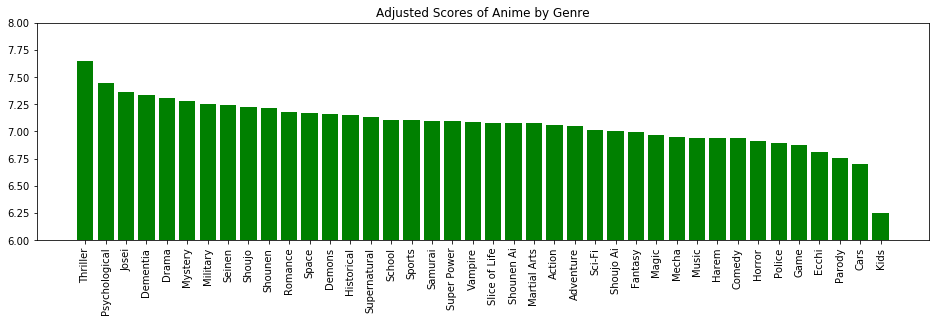

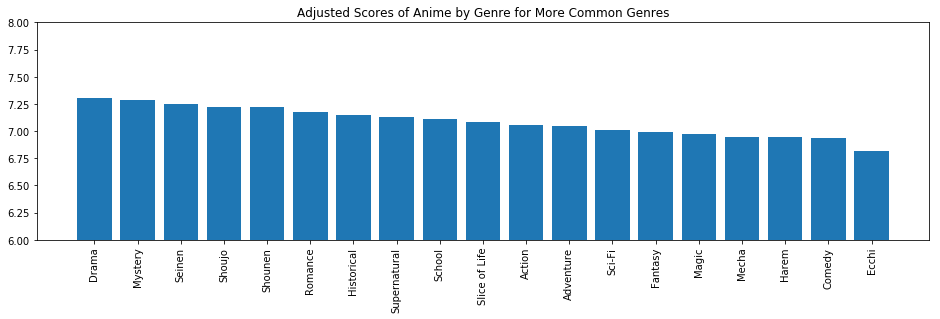

In [26]:
plt.figure(figsize=(16, 4))

genre_info = genre_info.sort_values('adj_score', ascending=False)

genre_info_above = genre_info.loc[genre_info['count'] >= 150]
genre_info_above = genre_info_above.sort_values('adj_score', ascending=False)

genres = list(genre_info.index)
scores = list(genre_info['adj_score'])

genres_above = list(genre_info_above.index)
scores_above = list(genre_info_above['adj_score'])

plt.title('Adjusted Scores of Anime by Genre')
plt.bar(np.arange(0,len(genres)), scores, color='green')
plt.xticks(np.arange(0,len(genres)), genres, rotation='vertical')
plt.ylim(6,8)
plt.show()

plt.figure(figsize=(16, 4))
plt.title('Adjusted Scores of Anime by Genre for More Common Genres')
plt.bar(np.arange(0,len(genres_above)), scores_above)
plt.xticks(np.arange(0,len(genres_above)), genres_above, rotation='vertical')
plt.ylim(6,8)
plt.show()


Looking at all of the scores for the different genres, the top 4 are shows with a significantly lower amount of total shows than the other categories. This may be indicitive of the genre being better, but there is also an aspect of simply only the best manga being adapted into television for these genres, or that only the specific people they cater to would watch them as opposed to the general public.

To provide an alternative chart, I took only the genres with >150 shows and ordered them by avg rating. The alternative could be to weight genres by the number of shows it has, but that would cause drastically different numbers due to the large discrepancy between certain genres.

Looking specifically at the bottom chart, the first thing to note is that all 3 demographic tags average very similar scores. Regardless of the amount of these categories, people who watch them mostly enjoy them around the same overall. 

Drama and Mystery take the top 2 spots (with Romance following them after the demographic tags). Harem, Comedy, and Ecchi take the last 3. This could mean that even though Comedy may be the most popular genre by count, in terms of ratings there is a trend towards more serious content. Harem and Ecchi shows (which will usually end up being weirdly sexual and full of fanservice that many find offputting) being ranked lower furthers this point since even if people end up watching them, they tend to like them (slightly) less than the more serious categories.

Taking a look back at the top chart, the main outliers are Thriller (way above) and Kids (way below). As mentioned, these have a lower amount of total shows which may result in an inconsistent average. Regardless, they fall in line with the same reason for the more popular genres taking top spots. Thriller is another more serious genre that probably leaves a more lasting impression then a comedy would (much like many serious movies reach critical acclaim over comedies). Kids being lower makes sense as well since kids shows will tend to be less serious and impactful, as well as it is uncommon that users on the site are actual children (younger than 12) which means that the shows will not necessarily be marketed for them. The main kids shows that people would be interested in are Pokemon and Digimon, which take most of the highest popularity spots for the genre.

### Episodes

In [27]:
shows_eps = shows_pure[['episodes', 'popularity', 'rank']]
shows_eps = shows_eps.dropna()
eps_groups = shows_eps.groupby(['episodes']).mean()
eps_groups['counts'] = shows_eps.groupby(['episodes']).popularity.count()
eps_groups = eps_groups.loc[eps_groups.index >=10]
eps_groups.sort_values('counts', ascending=False)[0:15]

,popularity,rank,counts
episodes,,,
12,2285.680690,4056.774542,927
13,2908.060362,3719.197183,497
26,3935.931677,3492.059006,322
24,2692.306452,3189.397849,186
25,2835.255172,2737.662069,145
52,6139.204082,4547.428571,98
10,4402.905263,4823.978947,95
51,4993.880952,4063.642857,84
11,2129.164179,2851.626866,67


NOTE that this is the ORIGINAL dataset before account for combining seasons (excluding episodes < 10).

The first thing to note is that the most common lengths for shows will be some multiple of 10-13 or some combination of these numbers. This is due to the way that Japanese TV airs shows on a seasonal basis: a season will be 13 weeks long, with some shows using that entire block or just one part of it. The timing for one of these 13 week blocks is usually called a cour. As seen, 12 and 13 are the most common on a per cour basis.

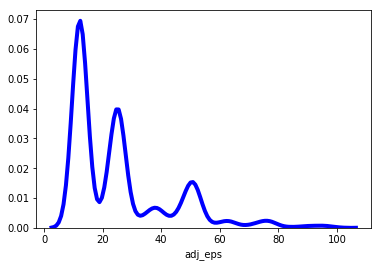

In [28]:
shows_eps = shows[['adj_eps', 'episodes', 'adj_score', 'standardized_adj_score', 'popularity', 'rank']]
shows_eps = shows_eps.dropna()

sns.distplot(shows.loc[shows['adj_eps'] < 100].adj_eps, hist=False, kde=True, 
             bins=int(20), color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

The distribution for episodes seems a bit odd, since there isn't a very continuous trend around any amount (like the age curve analyzed earlier). Looking at the data below shows some of the reasoning

In [29]:
eps_groups = shows_eps.groupby(['adj_eps']).mean()
eps_groups['counts'] = shows_eps.groupby(['adj_eps']).popularity.count()
eps_groups = eps_groups.sort_values('counts', ascending=False)
eps_groups.head(10)

,episodes,adj_score,standardized_adj_score,popularity,rank,counts
adj_eps,,,,,,
12.0,12.000000,6.827918,-0.155516,2207.734043,4272.685410,658
26.0,23.608844,7.065430,0.143436,3656.115646,3550.989796,294
13.0,13.000000,6.877069,-0.093651,3072.120690,4272.468966,290
24.0,19.787129,7.101953,0.189406,2408.094059,3441.356436,202
25.0,22.804124,7.120606,0.212884,3123.453608,3418.958763,97
52.0,46.887640,6.899559,-0.065343,5941.314607,4221.449438,89
10.0,10.000000,6.576377,-0.472126,4387.217391,5289.318841,69
50.0,44.844828,7.074543,0.154905,5178.965517,3807.913793,58
11.0,11.000000,7.132400,0.227729,2428.520000,3327.440000,50


Now, considering the adjusted amount of episodes (each full show is totalled up), we see that there is still a large amount of single cour episodes, but now there is a bit more density among shows with length 24-26. Regardless, the data should probably be looked at from a # of cour basis instead of episodes.

In [30]:
shows_eps = shows[['adj_eps', 'episodes', 'adj_score', 'standardized_adj_score', 'popularity', 'rank']]
shows_eps = shows_eps.dropna()
eps_groups = shows_eps.groupby(pd.cut(shows_eps['adj_eps'], [9,13,19,26,29,39,55,100,250,500,2000])).mean()
eps_counts = shows_eps.groupby(pd.cut(shows_eps['adj_eps'], [9,13,19,26,29,39,55,100,250,500,2000])).adj_eps.count()

eps_groups = eps_groups.drop(eps_groups.index[1])
eps_groups = eps_groups.drop(eps_groups.index[2])
eps_groups = eps_groups.drop(eps_groups.index[7])

eps_groups['counts'] = eps_counts
eps_groups

,adj_eps,episodes,adj_score,standardized_adj_score,popularity,rank,counts
adj_eps,,,,,,,
"(9, 13]",12.095595,12.095595,6.839278,-0.141217,2593.953140,4294.074977,1067
"(19, 26]",24.755224,21.958209,7.072324,0.152112,3370.892537,3608.871642,670
"(29, 39]",36.242647,30.264706,7.046044,0.119035,4824.125000,3857.433824,136
"(39, 55]",49.466877,44.119874,7.038734,0.109834,5261.558360,3745.236593,317
"(55, 100]",74.045455,56.643939,6.976612,0.031642,5014.022727,3935.340909,132
"(100, 250]",144.552083,102.458333,7.016321,0.081623,4771.770833,4038.708333,96
"(250, 500]",324.055556,229.444444,7.008620,0.071930,4416.833333,3561.666667,18


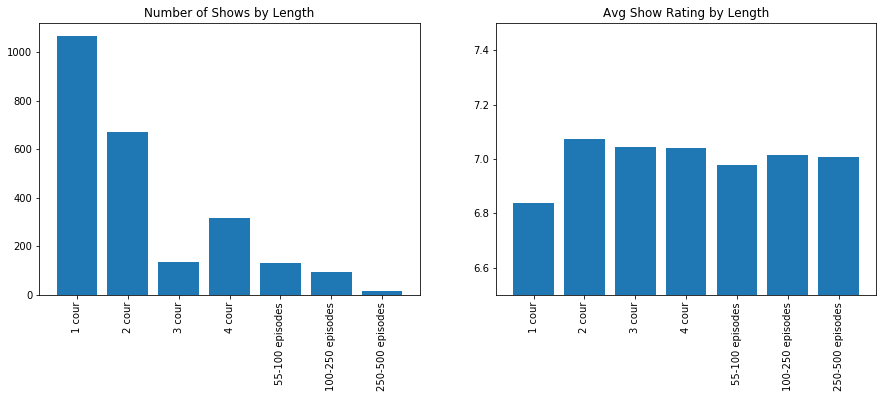

In [31]:
xt = ( '1 cour', '2 cour', '3 cour', '4 cour', '55-100 episodes', '100-250 episodes', '250-500 episodes' )

plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.title('Number of Shows by Length')
plt.bar(np.arange(0,7), eps_groups['counts'])
plt.xticks(np.arange(0,7), xt, rotation='vertical')

plt.subplot(1,2,2)
plt.title('Avg Show Rating by Length')
plt.bar(np.arange(0,7), eps_groups['adj_score'])
plt.xticks(np.arange(0,7), xt, rotation='vertical')
plt.ylim(6.5,7.5)

plt.show()

The episodes data doesn't seem to have too much to unpack. First, note that most shows only go on for one cour, even after considering all of the seasons combined. There are plenty of manga that finish their story quick enough to fit into one 12 or 13 episode bunch, and there are multiple comedic manga that don't necessarily get any more than 1 season due to the fact that they don't have a plotline to finish (and don't make enough money to continue). Second, there is a surpringly low amount of shows that are 3-cour. This is possibly due to the fact that shows may wish to publish in two 2-cour segments instead of trying to publish 1 cour at a time or one long then one short season. Third, note that there are actually a decent amount of shows that make it quite far into the episode count (not pictured is shows with between 500 and 1800) due to their source material being continuously published (and continuously popular).

Look at score, there is not much variation among any length except that 1 cour shows rate lower on average. This lines up with the idea that if a show is not popular, it won't continue getting made, and will therefore sit at 1 cour for eternity.

# IV. Conclusions and Further Research

After looking at the various pieces of data available, there are a few conclusions that we can talk about regarding demographics and information about the community and the shows they watch.

Looking at the users of MyAnimeList, we see pretty clear gender discrepancies, both male users of the site and the amount the male users have watched were significantly larger than female users. It is not uncommon for certain interests and hobbies to have a gender skew, and anime is no exception. Although there was a larger male fanbase, men and women tended to rate shows rather similarly on average. For age, there is a fairly normal looking curve, centered around the early 20s, with upper values in their 40s and lower values around 9 or 10 (up for debate if there are any significant amount of legitimate children using the site). This doesn't necessarily represent the age of the average anime fan, since more hardcore fans will tend to be older. Analyzing the stats about shows watched and rated, age doesn't have a huge impact on rating overall, but as one would expect, it does effect how many shows total you've watched. The location data was unfortunately not completely able to be parsed, since it allowed users to submit whatever they wanted. This led to many different unique and imaginary locations, as well as mispellings of certain places. Most users still tended to be from somewhere in the USA, and the other popular locations were scattered throughout Europe and SA.

The shows data included a good amount of information (maybe a little bit too much). Looking at the average rating among every show, the distribution centers around 7, instead of the expected 5 and skews towards higher ratings in general. When considering whether rating directly effects how popular a show is (and vice versa) we see the expected positive relationship (higher popularity = higher score). There are some notable exceptions to this of course. Analyzing the different genres among shows, there are significantly more comedic shows than any other genre (action shows are also relatively high). Going back to gender, there are a lot more shows marketed toward men than women, which can help explain the gender discrepancies discovered earlier. We also see that the more serious genres tend to receive higher scores, despite them not necessarily being as common. Finally, looking at the length of different shows, there are quite a lot that sit around one season (10-13 episodes) and the interesting bit that there are more shows with 4 cours (around 50 episodes) than 3 cours (around 40 episodes). Ratings tend to stay fairly consistent among there different lengths, but there is a large dip for shorter shows since a bad show will likely never get another season (money talks, etc.).

This tutorial took a look at some basic user data for different trends and demographic information that can explain why certain people like certain shows, and how likely one is to become a fan of different shows. There is a lot of research, data gathering, and analysis that can still be done among this site/community. There is a dataset that gives each users personal list (which is public), and could be used to find trends between two genres or shows based on how many people who watch shows (X,Y,Z) also watch shows (X',Y',Z'). This dataset was a bit too large for my computer to handle, and the time limit on this project made it hard to add more than what is already here. Overall, this tutorial gives an interesting glimpse, but is a lot left to think about.